In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
model_1_data = pd.read_csv('model_1/model_1_data.csv')

In [51]:
model_1_data['score_diff'] = model_1_data['attack_score'] - model_1_data['defend_score']

In [52]:
model_1_data['score'] = ((model_1_data['score_1'] == 1) | (model_1_data['score_2'] == 1)).astype(int)

In [61]:
model_1_data[['pass_recipient_name', 'sk_recipient_id', 'player_1', 'player_2']].head(10)

,pass_recipient_name,sk_recipient_id,player_1,player_2
0,C. Bizet Ildhusøy,62787,62787.0,57093.0
1,M. Bartrip,68737,68737.0,NaN
2,J. Rytting Kaneryd,63556,NaN,22354.0
3,N. Charles,57099,57099.0,57094.0
4,A. James,64167,64167.0,57095.0
5,G. Clinton,68683,68683.0,63774.0
6,N. Charles,57099,57099.0,22364.0
7,G. Clinton,68683,68683.0,62874.0
8,C. Bizet Ildhusøy,62787,62787.0,57099.0
9,C. Bizet Ildhusøy,62787,62787.0,NaN


In [59]:
same = model_1_data[model_1_data['sk_recipient_id'] == model_1_data['player_1']]

In [62]:
len(same)/len(model_1_data)

0.8267450404114621

In [42]:
model_1_data.describe()

,sk_match_id,frame,minute,pass_recipient_id,sk_player_id,pass_angle,location_x,location_y,period,receive_frame,receive_x,receive_y,ball_x_0,ball_y_0,ball_x_1,ball_y_1,player_1,ball_x_2,ball_y_2,player_2,ball_x_3,ball_y_3,player_3,player_0,sk_recipient_id,dist_0,dist_1,dist_2,dist_3,score_1,score_2,score_3,attack_score,defend_score,SoF,attacker_count,defender_count,combined_score,score_diff,score
count,6.818000e+03,6818.000000,6818.000000,6818.000000,6813.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6402.000000,6402.000000,6104.000000,5231.000000,5231.000000,5008.000000,3975.000000,3975.000000,3837.000000,0.0,6818.000000,6818.000000,6402.000000,5231.000000,5231.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,1.302102e+06,30193.187885,47.524641,304383.123643,76928.384999,4.480933,70.893077,50.139044,1.509387,30206.585069,0.297969,-2.754248,0.296260,-2.824306,0.421048,-2.752734,76780.410059,0.640616,-2.094561,81963.587061,0.175482,-1.652226,77792.354444,NaN,76595.926078,35.603996,33.186321,31.194428,31.194428,0.429745,0.438252,0.438252,0.810208,0.623350,83.172090,3.054415,5.633470,0.715145,0.186858,0.593282
std,1.074403e+05,17654.835018,27.608977,198790.376571,119892.209668,83.465106,12.809278,33.743904,0.499949,17655.072073,29.946003,27.297773,30.119988,26.783163,33.058610,25.466809,113143.277531,33.193046,21.693165,132436.035221,30.965312,19.721686,122363.753666,NaN,113899.928387,5.605488,7.978409,12.570843,12.570843,0.495076,0.496209,0.496209,1.165768,0.953116,129.118179,1.984494,2.383413,0.679736,1.514196,0.491257
min,1.133199e+06,169.000000,0.000000,1703.000000,22327.000000,-178.000000,6.000000,0.000000,1.000000,196.000000,-52.190000,-38.570000,-54.170000,-36.840000,-56.830000,-40.280000,22327.000000,-57.470000,-39.390000,22327.000000,-55.360000,-38.500000,22327.000000,NaN,22327.000000,19.293175,3.890823,0.230868,0.230868,0.000000,0.000000,0.000000,0.000000,0.000000,0.192756,0.000000,-1.000000,0.000000,-7.000000,0.000000
25%,1.224542e+06,14861.250000,24.000000,134342.000000,22712.000000,-43.000000,63.000000,16.000000,1.000000,14875.000000,-28.047500,-28.105000,-28.187500,-27.767500,-30.657500,-26.840000,22724.000000,-30.585000,-22.805000,22712.000000,-28.100000,-19.255000,22700.000000,NaN,22712.000000,31.703529,28.092232,23.155720,23.155720,0.000000,0.000000,0.000000,0.000000,0.000000,22.878108,2.000000,4.000000,0.000000,-1.000000,0.000000
50%,1.303618e+06,29960.500000,47.000000,290005.000000,62415.000000,0.000000,71.000000,51.000000,2.000000,29968.000000,17.230000,-21.475000,16.330000,-21.500000,10.360000,-17.070000,62415.000000,0.910000,-4.030000,62647.000000,0.360000,-2.210000,62520.000000,NaN,62411.000000,35.804054,33.768200,32.326406,32.326406,0.000000,0.000000,0.000000,0.000000,0.000000,51.987133,3.000000,6.000000,0.651225,0.000000,1.000000
75%,1.385658e+06,45316.500000,70.000000,476759.000000,68421.000000,49.000000,79.000000,84.000000,2.000000,45324.750000,28.350000,26.317500,28.330000,25.820000,31.360000,24.400000,68512.000000,31.710000,19.055000,68662.000000,28.230000,15.700000,68512.000000,NaN,68661.000000,39.850572,38.828845,39.347207,39.347207,1.000000,1.000000,1.000000,1.000000,1.000000,121.187933,5.000000,7.000000,1.651225,1.000000,1.000000
max,1.618208e+06,67075.000000,107.000000,986901.000000,812924.000000,180.000000,99.000000,100.000000,2.000000,67082.000000,53.060000,36.150000,53.780000,35.760000,59.590000,36.730000,812924.000000,59.580000,36.970000,812924.000000,58.080000,36.970000,812881.000000,NaN,812924.000000,49.319311,63.598105,101.335854,101.335854,1.000000,1.000000,1.000000,7.000000,7.000000,7161.433601,9.000000,10.000000,1.651225,7.000000,1.000000


In [53]:
model_1_data = model_1_data[model_1_data['SoF']<350]

In [ ]:
sampled_df = (
    model_1_data.groupby('sk_match_id', group_keys=False)
      .apply(lambda group: group.sample(frac=0.2, random_state=42))
)


In [23]:
model_1_data.score.value_counts()

score
1    4045
0    2773
Name: count, dtype: int64

In [24]:
features = ["score_diff", "SoF", "attacker_count", "defender_count"]
target = "score"

In [54]:
model_df = model_1_data[features+[target]]

In [26]:
model_df.isna().sum()

score_diff        0
SoF               0
attacker_count    0
defender_count    0
score             0
dtype: int64

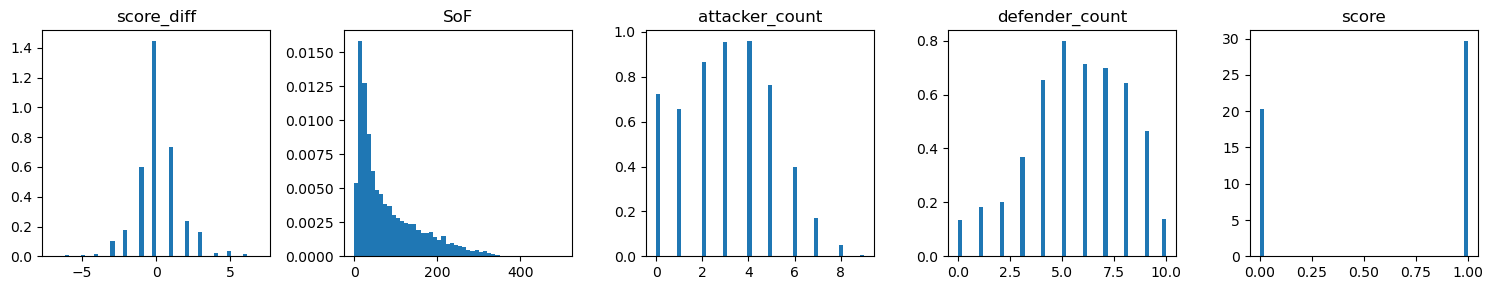

In [31]:
plt.figure(figsize=(18,3))

for i, col in enumerate(features+[target]):
    plt.subplot(1, 6, i+1)
    plt.hist(model_df[col], bins=50, density=True)
    plt.title(col)

plt.tight_layout()
plt.show()

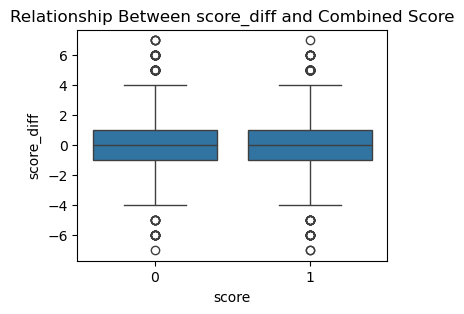

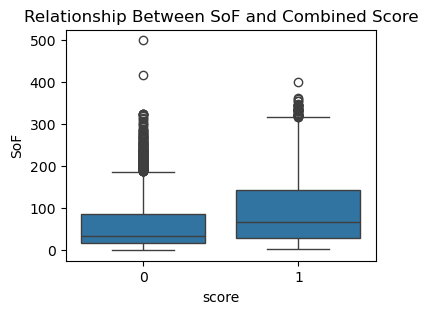

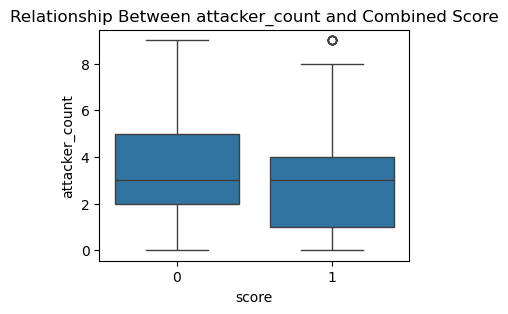

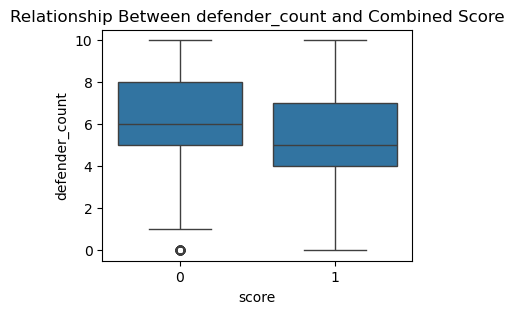

In [32]:
for feature in features:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=model_df[target], y=model_df[feature])
    plt.title(f"Relationship Between {feature} and Combined Score")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

In [33]:
model_df[target].value_counts()

score
1    4041
0    2771
Name: count, dtype: int64

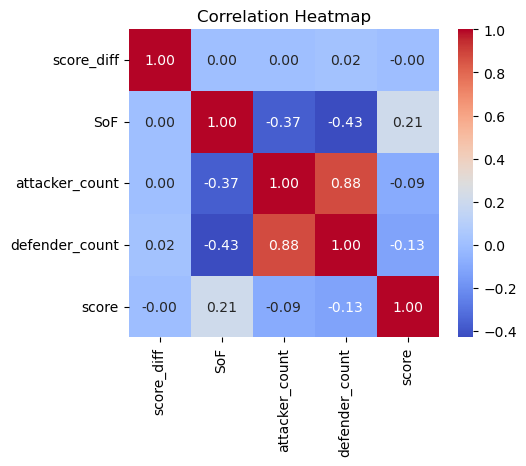

In [34]:
correlation_matrix = model_df[features + [target]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [56]:
X = model_df[features]
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [57]:
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
        },
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["liblinear", "lbfgs"],
        },
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
}

# Perform GridSearchCV for each model
best_models = {}
for name, entry in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(entry["model"], entry["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.4f}\n")

# Compare performance on the test set
print("Performance Comparison:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Optimizing RandomForest...
Best params for RandomForest: {'max_depth': 10, 'n_estimators': 100}
Best cross-validated accuracy for RandomForest: 0.6054

Optimizing GradientBoosting...
Best params for GradientBoosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Best cross-validated accuracy for GradientBoosting: 0.6072

Optimizing LogisticRegression...
Best params for LogisticRegression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy for LogisticRegression: 0.5918

Optimizing KNeighbors...
Best params for KNeighbors: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validated accuracy for KNeighbors: 0.6073

Optimizing XGBoost...
Best params for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 150}
Best cross-validated accuracy for XGBoost: 0.6099

Performance Comparison:
Model: RandomForest
Accuracy: 0.5871
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.59      

In [82]:
results_df

,Best Params,MSE,R2
Lasso,{'alpha': 0.001},0.415427,0.030002
Ridge,{'alpha': 10},0.415453,0.02994
Linear Regression,{},0.415475,0.029889
Random Forest,"{'max_depth': 10, 'n_estimators': 200}",0.426345,0.004509
Gradient Boosting,"{'learning_rate': 0.1, 'n_estimators': 50}",0.416057,0.028531
